## 1. Momentum：动量法    
在当前的梯度值上加上 上一次梯度值的衰减。   
所以当前梯度与上一次梯度方向相同时，加大更新力度；否则消减更新力度

In [1]:
import numpy as np
import matplotlib.pyplot as plt     

In [2]:
# 设置的函数为：z = x^2 + 50* y^2
def f(x):
    return x[0] * x[0] + 50 * x[1] * x[1]
def g(x):
    return np.array([2 * x[0] , 100 *x[1]])

xi = np.linspace(-200, 200, 1000)
yi = np.linspace(-100, 100, 1000)
# 生成网格点坐标
X, Y = np.meshgrid(xi, yi)
Z = X * X + 50 * Y * Y

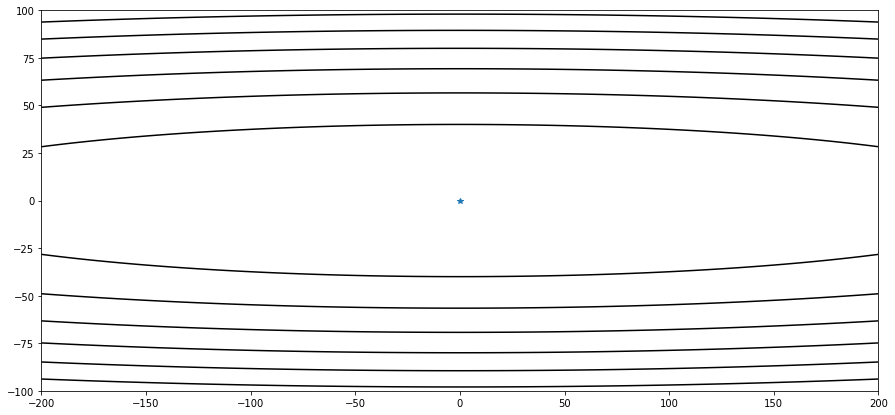

In [3]:
# 绘制轮廓线
def contour(X,Y,Z, arr = None):
    plt.figure(figsize=(15,7))
    xx = X.flatten()
    yy = Y.flatten()
    zz = Z.flatten()
    plt.contour(X, Y, Z, colors='black')
    
    # 中心的蓝色点，就是最优值         
    plt.plot(0,0,marker='*')
    if arr is not None:
        arr = np.array(arr)
        for i in range(len(arr) - 1):
            plt.plot(arr[i:i+2,0],arr[i:i+2,1])
        
contour(X,Y,Z)

尝试用原始的梯度下降法

Epoch 0, grad=[ 300. 7500.], x=[145.2 -45. ]
Epoch 1, grad=[  290.4 -4500. ], x=[140.5536  27.    ]
Epoch 2, grad=[ 281.1072 2700.    ], x=[136.0558848 -16.2      ]
Epoch 3, grad=[  272.1117696 -1620.       ], x=[131.70209649   9.72      ]
Epoch 4, grad=[263.40419297 972.        ], x=[127.4876294  -5.832    ]
Epoch 5, grad=[ 254.9752588 -583.2      ], x=[123.40802526   3.4992    ]
Epoch 6, grad=[246.81605052 349.92      ], x=[119.45896845  -2.09952   ]
Epoch 7, grad=[ 238.9179369 -209.952    ], x=[115.63628146   1.259712  ]
Epoch 8, grad=[231.27256292 125.9712    ], x=[111.93592045  -0.7558272 ]
Epoch 9, grad=[223.87184091 -75.58272   ], x=[108.353971     0.45349632]
Epoch 10, grad=[216.707942  45.349632], x=[104.88664393  -0.27209779]
Epoch 11, grad=[209.77328785 -27.2097792 ], x=[101.53027132   0.16325868]
Epoch 12, grad=[203.06054264  16.32586752], x=[ 9.82813026e+01 -9.79552051e-02]
Epoch 13, grad=[196.56260528  -9.79552051], x=[9.51363010e+01 5.87731231e-02]
Epoch 14, grad=[190.27

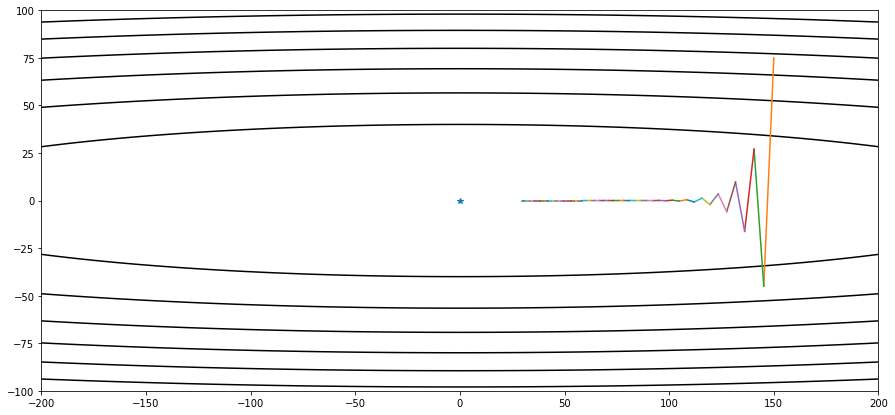

In [4]:
def gd(x_start, step, g):
    x = np.array(x_start, dtype='float64')
    passing_dot = [x.copy()]
    
    for i in range(50):
        grad = g(x)
        x -= grad * step
        passing_dot.append(x.copy())
        print('Epoch {0}, grad={1}, x={2}'.format(i, grad, x))
        
        if abs(sum(grad)) < 1e-6:
            break;
    return x, passing_dot

res, x_arr = gd([150,75], 0.016, g)
contour(X,Y,Z, x_arr)

### 上图   
可以看出整体趋势是趋近最优点的，但刚开始有些抖动且速度较慢   
所以下面加大步长

Epoch 0, grad=[ 300. 7500.], x=[146.4 -15. ]
Epoch 1, grad=[  292.8 -1500. ], x=[142.8864   3.    ]
Epoch 2, grad=[285.7728 300.    ], x=[139.4571264  -0.6      ]
Epoch 3, grad=[278.9142528 -60.       ], x=[1.36110155e+02 1.20000000e-01]
Epoch 4, grad=[272.22031073  12.        ], x=[ 1.32843512e+02 -2.40000000e-02]
Epoch 5, grad=[265.68702328  -2.4       ], x=[1.29655267e+02 4.80000000e-03]
Epoch 6, grad=[259.31053472   0.48      ], x=[ 1.26543541e+02 -9.60000000e-04]
Epoch 7, grad=[ 2.53087082e+02 -9.60000000e-02], x=[1.23506496e+02 1.92000000e-04]
Epoch 8, grad=[2.47012992e+02 1.92000000e-02], x=[ 1.2054234e+02 -3.8400000e-05]
Epoch 9, grad=[ 2.4108468e+02 -3.8400000e-03], x=[1.17649324e+02 7.68000000e-06]
Epoch 10, grad=[2.35298648e+02 7.68000000e-04], x=[ 1.1482574e+02 -1.5360000e-06]
Epoch 11, grad=[ 2.2965148e+02 -1.5360000e-04], x=[1.12069922e+02 3.07200000e-07]
Epoch 12, grad=[2.24139845e+02 3.07200000e-05], x=[ 1.09380244e+02 -6.14400000e-08]
Epoch 13, grad=[ 2.18760488e+02 -6

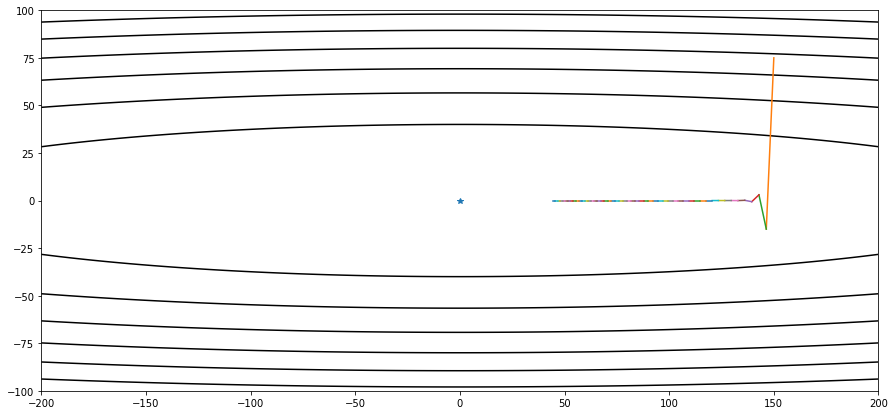

In [15]:
res, x_arr = gd([150,75], 0.012, g)
contour(X,Y,Z, x_arr)

### 通过上图   
加大步长后，虽然速度提升了，但抖动也加大了许多，下面尝试动量法

[ Epoch 0 ] grad = [ 300. 7500.], x = [146.4 -15. ]
[ Epoch 1 ] grad = [  292.8 -1500. ], x = [140.3664 -60.    ]
[ Epoch 2 ] grad = [  280.7328 -6000.    ], x = [132.7740864 -19.5      ]
[ Epoch 3 ] grad = [  265.5481728 -1950.       ], x = [124.27288881  32.25      ]
[ Epoch 4 ] grad = [ 248.54577761 3225.        ], x = [115.33950116  29.775     ]
[ Epoch 5 ] grad = [ 230.67900232 2977.5       ], x = [106.31798178  -7.6875    ]
[ Epoch 6 ] grad = [ 212.63596356 -768.75      ], x = [ 97.45128665 -24.68625   ]
[ Epoch 7 ] grad = [  194.9025733 -2468.625    ], x = [88.90576918 -6.961875  ]
[ Epoch 8 ] grad = [ 177.81153836 -696.1875    ], x = [80.79016849 13.7994375 ]
[ Epoch 9 ] grad = [ 161.58033698 1379.94375   ], x = [73.17028396 11.77303125]
[ Epoch 10 ] grad = [ 146.34056793 1177.303125  ], x = [66.08027798 -3.77309063]
[ Epoch 11 ] grad = [ 132.16055596 -377.3090625 ], x = [ 59.53134712 -10.12766719]
[ Epoch 12 ] grad = [  119.06269424 -1012.76671875], x = [53.51834319 -2.4226701

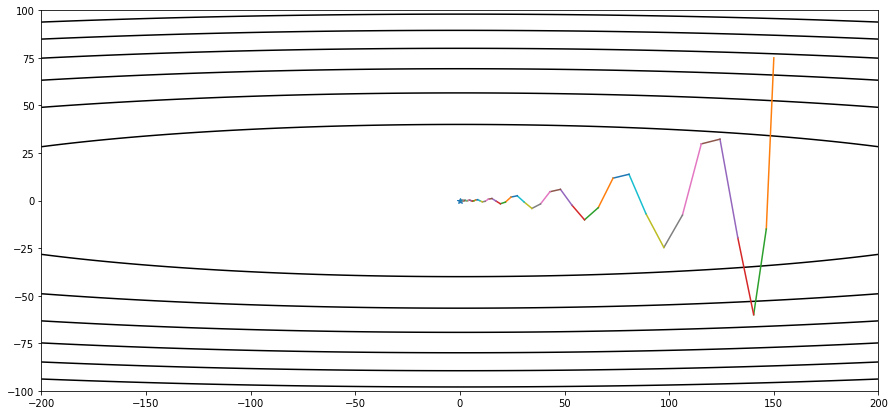

In [14]:
def momentum(x_start, step, g, discount = 0.7):
    x = np.array(x_start, dtype='float64')
    passing_dot = [x.copy()]
    pre_grad = np.zeros_like(x)
    
    for i in range(50):
        grad = g(x)
        pre_grad = pre_grad * discount + grad
        x -= pre_grad * step
        
        passing_dot.append(x.copy())
        print('[ Epoch {0} ] grad = {1}, x = {2}'.format(i, grad, x))
        
        if abs(sum(grad)) < 1e-6:
            break;
    return x, passing_dot

res, x_arr = momentum([150,75], 0.012, g)
contour(X,Y,Z, x_arr)

## 2. NAG - Nesterov accelerated gradient    
nesterov项在梯度更新时做一个校正，避免前进太快，相当于预估了下一次参数所在的位置，提高了灵敏度


Epoch 0, grad=[ 300. 7500.], x=[146.4 -15. ]
Epoch 1, grad=[  287.76 -7800.  ], x=[140.42688  15.6    ]
Epoch 2, grad=[ 272.491392 3702.      ], x=[132.9757993  -7.404    ]
Epoch 3, grad=[  255.52008561 -2350.68      ], x=[124.69380178   4.70136   ]
Epoch 4, grad=[ 237.79280702 1317.5112    ], x=[116.04288983  -2.6350224 ]
Epoch 5, grad=[ 219.97450293 -777.049008  ], x=[107.34755743   1.55409802]
Epoch 6, grad=[202.5216495  448.64823072], x=[98.83056496 -0.89729646]
Epoch 7, grad=[ 185.73734045 -261.32725956], x=[90.63982214  0.52265452]
Epoch 8, grad=[169.81260433 151.66202055], x=[82.86855092 -0.30332404]
Epoch 9, grad=[154.85732212 -88.15090333], x=[75.57037319  0.17630181]
Epoch 10, grad=[140.92329758  51.20399001], x=[68.77056922 -0.10240798]
Epoch 11, grad=[128.02141287 -29.75048307], x=[6.24744495e+01 5.95009661e-02]
Epoch 12, grad=[116.13433133  17.28372284], x=[ 5.66735537e+01 -3.45674457e-02]
Epoch 13, grad=[105.22585326 -10.0415334 ], x=[5.13502164e+01 2.00830668e-02]
Epoch 

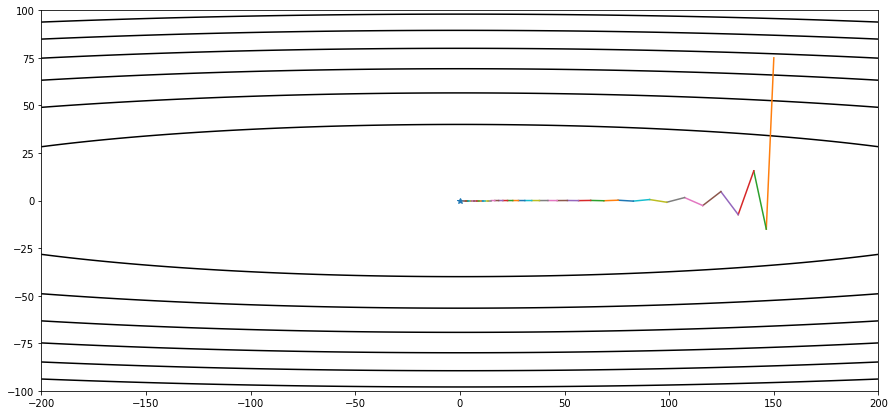

In [13]:
def nesterov(x_start, step, g, discount=0.7):
    x = np.array(x_start, dtype='float64')
    pre_grad = np.zeros_like(x)
    passing_dot = [x.copy()]
    
    for i in range(50):
        x_future = x - step * discount * pre_grad
        grad = g(x_future)
        pre_grad = pre_grad * discount + grad
        x -= pre_grad * step
        passing_dot.append(x.copy())
        
        print('Epoch {0}, grad={1}, x={2}'.format(i, grad, x))
        if abs(sum(grad)) < 1e-6:
            break;
    return x, passing_dot

res, x_arr = nesterov([150,75], 0.012, g)
contour(X,Y,Z, x_arr)